<a href="https://colab.research.google.com/github/Alexiane-lc/dairy_book/blob/main/ECAS_TM_Practice_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECAS-SFdS course on Textmining -- Practice Lab 2

**Aim:** to construct basic classifiers using well-known machine learning tools.

**Roadmap**

1. Topic modeling (_unsupervised learning_)


## 1. Topic Modelling

In [ ]:
import os 
import numpy
import pandas
from nltk.tokenize import RegexpTokenizer
from nltk import download; download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

#with open("wikipedia_philo.txt") as f:
#    lines = [line.strip() for line in f.readlines()]

with open("responses-flash-presentation.txt") as f:
    lines = [line.strip() for line in f.readlines()]

tokenizer = RegexpTokenizer(r'\w+')
en_stop = stopwords.words("english")
p_stemmer = PorterStemmer()

# list for tokenized documents in loop
texts = []

# loop through document list
for i in lines:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)
  
print(texts)
print(len(texts))
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['current', 'primari', 'research', 'interest', 'use', 'electron', 'medic', 'record', 'contain', 'inform', 'patient', 'medic', 'histori', 'past', 'current', 'medic', 'lab', 'result', 'diagnos', 'advanc', 'qualiti', 'care'], ['given', 'lack', 'standard', 'record', 'interest', 'appli', 'text', 'mine', 'techniqu', 'automat', 'extract', 'valuabl', 'inform', 'text', 'corpora', 'classifi', 'entiti', 'pre', 'defin', 'categori'], ['je', 'intéress', 'au', 'domain', 'du', 'text', 'mine', 'dan', 'le', 'cadr', 'de', 'thèse'], ['phd', 'student', 'deal', 'natur', 'languag', 'process', 'quit', 'interest', 'learn', 'state', 'art', 'techniqu', 'text', 'mine', 'particular', 'argument', 'mine', 'main', 'topic', 'thesi'], ['depart', 'want', 'offer', 'cours', 'text', 'mine', 'task', 'design', 'cours', 'befallen', 'upon'], ['fairli', 'littl', 'experi', 'field', 'believ', 'hope', 'cours', 'g

In [ ]:

dictionary = corpora.Dictionary(texts)  # texts into dict
corpus = [dictionary.doc2bow(text) for text in texts] # document-term matrix

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20) #to estimate the model #passes = nb d'itération, plus il est élevé, plus il sera précis

In [ ]:
print(ldamodel.print_topics(num_topics=3, num_words=4)) #summary of the probability vectors for the words of each topic

ldamodel.show_topics(num_topics=3,formatted=False)

[(0, '0.016*"research" + 0.016*"clinic" + 0.016*"field" + 0.011*"current"'), (1, '0.016*"data" + 0.016*"research" + 0.016*"classif" + 0.012*"learn"'), (2, '0.033*"text" + 0.028*"mine" + 0.015*"medic" + 0.015*"interest"')]


[(0,
  [('research', 0.01631593),
   ('clinic', 0.016308581),
   ('field', 0.016280912),
   ('current', 0.011424232),
   ('develop', 0.011403483),
   ('product', 0.011398168),
   ('latex', 0.011398163),
   ('urc', 0.0113969),
   ('hegp', 0.011396598),
   ('team', 0.011396475)]),
 (1,
  [('data', 0.01649476),
   ('research', 0.016484233),
   ('classif', 0.016443834),
   ('learn', 0.011537551),
   ('topic', 0.011530461),
   ('includ', 0.011526479),
   ('step', 0.011510876),
   ('prune', 0.0115108),
   ('impact', 0.011510701),
   ('show', 0.011510416)]),
 (2,
  [('text', 0.032872096),
   ('mine', 0.02834726),
   ('medic', 0.014915684),
   ('interest', 0.014904516),
   ('contextu', 0.010449515),
   ('current', 0.010439443),
   ('standard', 0.010438651),
   ('inform', 0.0104378555),
   ('techniqu', 0.010437503),
   ('cours', 0.010437422)])]

In [ ]:
!pip install pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, gensim.matutils.corpus2csc(corpus), dictionary=ldamodel.id2word)
#vis
pyLDAvis.display(vis)

 ## 2. Regression using text

In [27]:
#!wget https://git.msh-lse.fr/eric/ecas-sfds-course-on-textmining/-/raw/main/datasets/daily_reports_France_II.csv
#!wget https://git.msh-lse.fr/eric/ecas-sfds-course-on-textmining/-/raw/main/datasets/data_load_FR.csv

import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df = pd.read_csv("daily_reports_France_II.csv", sep="\t")

text = df['texte']
#tf_vectorizer = CountVectorizer(min_df=100) #minimum document frequency for the words to be included
tf_vectorizer.fit(text)
X_texte = tf_vectorizer.transform(text)

# Alternative formulation using TF-IDF
#tfidf_vectorize = TfidfVectorizer()
#tfidf_vectorize.fit(lines)
#X_texte = tfidf_vectorize(lines)

load = pd.read_csv("data_load_FR.csv", sep = ";")
Y = load['Load'] #charge electrique en fonction de la date

print(X_texte.shape)
print(Y.shape)
print(text.head())

(3896, 974)
(3896,)
0    Mardi 1 janvier : les hautes pressions résiste...
1    Mercredi 2 janvier : à l'approche du talweg at...
2    Jeudi 3 janvier : circulant dans un flux de su...
3    Vendredi 4 janvier : à l'avant du talweg atlan...
4    Samedi 5 janvier : le talweg du nord des îles ...
Name: texte, dtype: object


In [16]:
from sklearn.ensemble import RandomForestRegressor as RFR

optim_HP = [0.05, 5, 10, 200]
rf = RFR(1000,                          #randomforest algorithm
         max_features=optim_HP[0], 
         min_samples_leaf=optim_HP[1],
         min_samples_split=optim_HP[2],
         max_depth=optim_HP[3])

rf.fit(X_texte, Y)
y_RF = rf.predict(X_texte)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

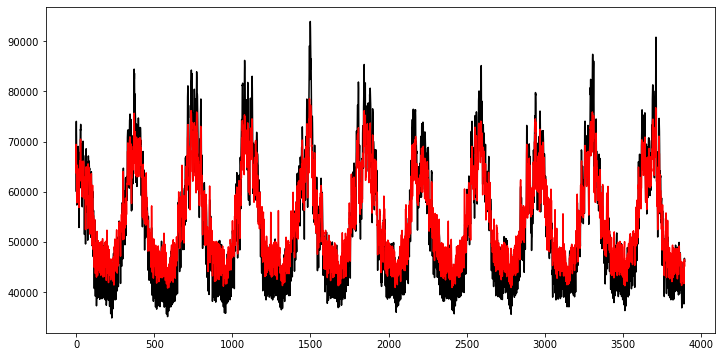

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(Y,color="black",label="Observed load")
plt.plot(y_RF,color="red",label="Forecast") #prevision

plt

What you can do : 

- Use another weighting scheme (tf-ifd instead of tf)
- Split the data into a train/test dataset.
- Obtain the predictions on the test set. Notice that you should manage to reduce the features to those appearing in the training set.
- Obtain the features importance 
- Try to fit a Lasso regression of Y over X

## Train and test

In [30]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_texte, Y, test_size=0.10)

texte_test = text[3531:3896]
texte_train = text[0:3531]

Y_test = Y[3531:3896]
Y_train = Y[0:3531]

tf_vectorizer = CountVectorizer(min_df=100)
tf_vectorizer.fit(texte_train)
X_texte = tf_vectorizer.transform(texte_train)

optim_HP = [0.05, 5, 10, 200]
rf = RFR(1000,                          #randomforest algorithm
         max_features=optim_HP[0], 
         min_samples_leaf=optim_HP[1],
         min_samples_split=optim_HP[2],
         max_depth=optim_HP[3])

rf.fit(X_texte, Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features=0.05, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
X_texte_test = tf_vectorizer.transform(texte_test)

y_RF= rf.predict(X_texte_test)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

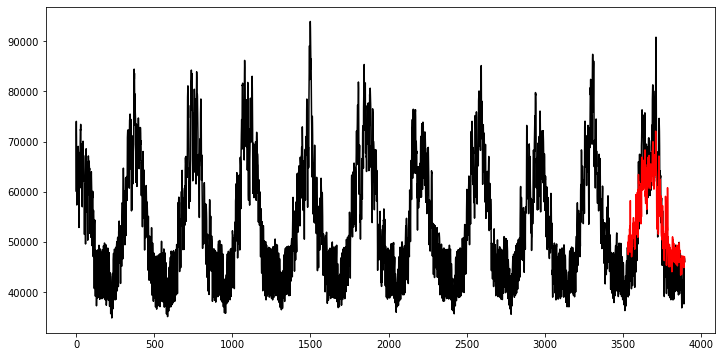

In [45]:
c = np.arange(start=3531,stop=3896)

plt.figure(figsize=(12,6))
plt.plot(Y,color="black",label="Observed load")
plt.plot(c,y_RF,color="red",label="Forecast") #prevision

plt

## Lasso regression

In [18]:
from sklearn import linear_model

lasso_model = linear_model.Lasso(alpha=1)
lasso_model.fit(X_texte, Y)
y_RF = lasso_model.predict(X_texte)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

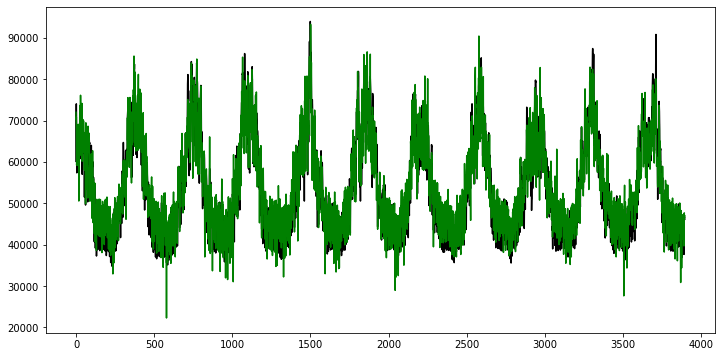

In [19]:
plt.figure(figsize=(12,6))
plt.plot(Y,color="black",label="Observed load")
plt.plot(y_RF,color="green",label="Forecast") #prevision

plt